# ¿Cómo crece una población? 

> El modelo más simple de crecimiento poblacional de organismos es $\frac{dx}{dt}=rx$, donde $x(t)$ es la población en el tiempo $t$ y $r>0$ es la tasa de crecimiento.

> Este modelo predice crecimiento exponencial $x(t)=x_0e^{rt}$ (solución de la ecuación diferencial) donde $x_0=x(0)$ es la población inicial. ¿Es esto válido?
- Recordar que $\lim_{t\to\infty}x(t)=x_0\lim_{t\to\infty}e^{rt}=\infty$.
- Este modelo no tiene en cuenta entonces sobrepoblación ni recursos limitados.

> En realidad la tasa de crecimiento no es una constante, sino que depende de la población $\frac{dx}{dt}=\mu(x)x$. Cuando $x$ es pequeña $\mu(x)\approx r$, como antes, pero cuando $x>1$ (población normalizada) $\mu(x)<0$: la tasa de muerte es mayor a la tasa de nacimiento. Una forma matemática conveniente de modelar lo anterior es con una tasa de crecimiento $\mu(x)$ decreciendo linealmente con $x$.

Referencia:
- Strogatz, Steven. *NONLINEAR DYNAMICS AND CHAOS*, ISBN: 9780813349107, (eBook disponible en biblioteca).

<img style="float: center;" src="./poblacion.jpg" width="450px" height="250px" />

## Ecuación Logística
Primero, veamos como luce $\mu(x)$ con decrecimiento lineal respecto a la población x.

Como queremos que $\mu(0)=r$ y $\mu(1)=0$, la línea recta que conecta estos puntos es... (graficar)

In [2]:
# Importar librerías necesarias
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# Definir función mu(x)
def mu(x, r):
    return r * (1 - x)

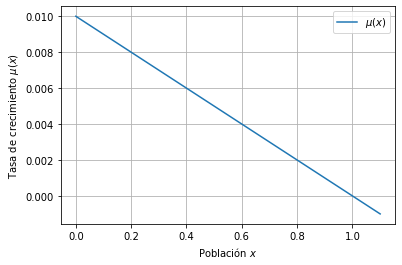

In [5]:
# Graficar
x = np.linspace(0, 1.1)
y = mu(x, 0.01)
plt.plot(x, y, label=r'$\mu(x)$')
plt.xlabel('Población $x$')
plt.ylabel('Tasa de crecimiento $\mu(x)$')
plt.grid()
plt.legend()

___
Entonces, con esta elección de $\mu(x)=r(1-x)$, obtenemos la llamada **ecuación lógistica**, publicada por Pierre Verhulst en 1838.

$$\frac{dx}{dt} = r\; x\; (1- x)$$

**Solución a la ecuación diferencial** 

La ecuación diferencial inicial tiene *solución analítica*, 
$$ x(t) = \frac{1}{1+ (\frac{1}{x_{0}}- 1) e^{-rt}}.$$

<font color = red> Ver en el tablero... </font>

Graficamos varias curvas de la solución analítica para $r = \left[-1, 1\right]$.

In [6]:
# Definir la solución analítica x(t,x0)
def x(t, x0, r):
    return 1 / (1 + (1 / x0 - 1) * np.exp(-r *t))
# Vector de tiempo
t = np.linspace(0, 10)
# Condicion inicial
x0 = 0.1

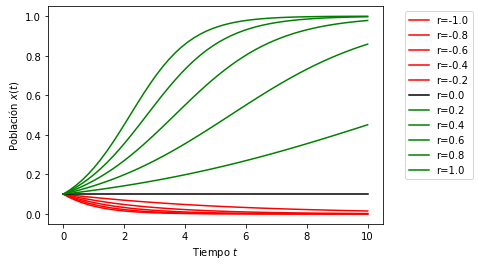

In [10]:
# Graficar para diferentes r entre -1 y 1
for r in np.linspace(-1, 1, 11):
    if r < 0:
        color = 'r'
    elif r == 0:
        color = 'k'
    else:
        color = 'g'
    plt.plot(t, x(t, x0, r), color, label=f'r={np.round(r, 2)}')

plt.xlabel('Tiempo $t$')
plt.ylabel('Población $x(t)$')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

Como podemos ver, la solución a está ecuación en el continuo nos puede ganantizar la extinción o bien un crecimiento descomunal, dependiendo del valor asignado a $r$. 

*Numéricamente*, ¿cómo resolveríamos esta ecuación? 

In [11]:
# Importamos función para integrar numéricamente ecuaciones diferenciales
from scipy.integrate import odeint

In [12]:
help(odeint)

Help on function odeint in module scipy.integrate.odepack:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)
    Integrate a system of ordinary differential equations.
    
    .. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
              differential equation.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y, t, ...)  [or func(t, y, ...)]
    
    where y can be a vector.
    
    .. note:: By default, the required order of the first two arguments of
              `func` are in the opposite order of the arguments in the system
              definition function used by the `scipy.integrate.ode` class and
     

In [14]:
# Definimos el campo de la ecuación diferencial
def f(x, t, r):
    return r * x * (1 - x)

In [16]:
# Parámetro r
r = 1
# Condición inicial
x0 = 0.1
# Vector de tiempo
# t: definido anteriormente
# Solución
x_num = odeint(func=f,
               y0=x0,
               t=t,
               args=(r,))

Text(0, 0.5, 'Población $x(t)$')

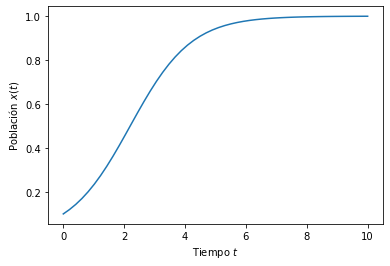

In [17]:
# Gráfico de la solución
plt.plot(t, x_num)
plt.xlabel('Tiempo $t$')
plt.ylabel('Población $x(t)$')

### ¿Qué tan buena es la aproximación de la solución numérica?
Hay ecuaciones diferenciales ordinarias no lineales para las cuales es imposible obtener la solución exacta. En estos casos, se evalúa una solución aproximada de forma numérica.

Para el caso anterior fue posible obtener la solución exacta, lo cual nos permite comparar ambas soluciones y evaluar qué tan buena es la aproximación que nos brinda la solución numérica.

Primero veamos esto gráficamente

In [18]:
# Solución numérica
# x_num
# Solución exacta
x_ex = x(t, x0, 1)

In [24]:
x_ex

array([0.1       , 0.11992475, 0.14318785, 0.17009139, 0.20086481,
       0.2356251 , 0.27433574, 0.31677053, 0.36249036, 0.41084098,
       0.46097746, 0.51191609, 0.56260842, 0.61202605, 0.65924203,
       0.70349567, 0.74423191, 0.78111282, 0.81400471, 0.84294775,
       0.86811663, 0.8897794 , 0.90825993, 0.92390685, 0.93706998,
       0.94808401, 0.95725829, 0.96487141, 0.97116933, 0.97636581,
       0.98064433, 0.98416087, 0.98704697, 0.98941284, 0.99135037,
       0.99293584, 0.9942324 , 0.99529211, 0.99615786, 0.99686492,
       0.99744218, 0.99791338, 0.99829793, 0.9986117 , 0.9988677 ,
       0.99907653, 0.99924688, 0.99938582, 0.99949915, 0.99959157])

In [25]:
x_num = x_num.reshape((50,))
x_num

array([0.1       , 0.11992477, 0.14318786, 0.17009139, 0.20086482,
       0.23562511, 0.27433577, 0.31677058, 0.36249043, 0.41084108,
       0.46097757, 0.51191619, 0.56260852, 0.61202614, 0.65924211,
       0.70349575, 0.74423198, 0.7811129 , 0.81400479, 0.84294784,
       0.86811671, 0.88977947, 0.90826   , 0.9239069 , 0.93707002,
       0.94808404, 0.95725831, 0.96487143, 0.97116934, 0.97636582,
       0.98064435, 0.98416089, 0.98704698, 0.98941285, 0.99135037,
       0.99293585, 0.9942324 , 0.99529211, 0.99615787, 0.99686492,
       0.99744219, 0.99791339, 0.99829793, 0.9986117 , 0.9988677 ,
       0.99907653, 0.99924688, 0.99938583, 0.99949915, 0.99959157])

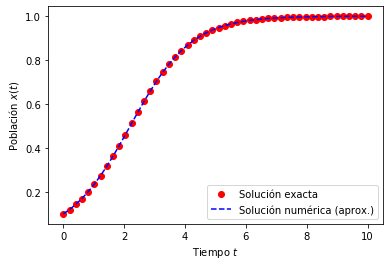

In [26]:
# Gráfica de comparación
plt.plot(t, x_ex, 'or', label='Solución exacta')
plt.plot(t, x_num, 'b--', label='Solución numérica (aprox.)')
plt.xlabel('Tiempo $t$')
plt.ylabel('Población $x(t)$')
plt.legend()

Gráficamente vemos que la solución numérica está cerca (coincide) con la solución exacta. Sin embargo, con esta gráfica no podemos visualizar qué tan cerca están una solución de la otra. ¿Qué tal si evaluamos el error?

In [29]:
# Error de aproximación
error = x_num - x_ex

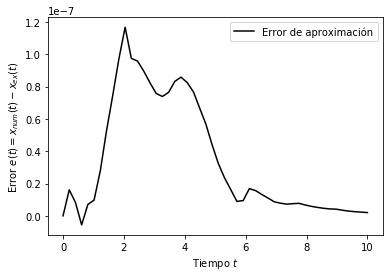

In [32]:
# Gráfica del error
plt.plot(t, error, 'k', label='Error de aproximación')
plt.xlabel('Tiempo $t$')
plt.ylabel('Error $e(t) = x_{num}(t) - x_{ex}(t)$')
plt.legend()

Entonces, **cualitativamente** ya vimos que la solución numérica es *suficientemente buena*. De todas maneras, es siempre bueno cuantificar *qué tan buena* es la aproximación. Varias formas:
- <font color=blue>Norma del error</font>: tenemos el error de aproximación en ciertos puntos (especificados por el vector de tiempo). Este error es entonces un vector y le podemos tomar su norma 2

$$||e||_2=\sqrt{e[0]^2+\dots+e[n-1]^2}$$

In [33]:
np.linalg.norm(error)

3.5088814601153774e-07

- <font color=blue>Error cuadrático medio</font>: otra forma de cuantificar es con el error cuadrático medio

$$e_{ms}=\frac{e[0]^2+\dots+e[n-1]^2}{n}$$

In [34]:
(error**2).mean()

2.4624498202282846e-15

- <font color=blue>Integral del error cuadrático</font>: evalúa la acumulación de error cuadrático. Se puede evaluar cabo con la siguiente aproximación rectangular de la integral

$$e_{is}=\int_{0}^{t_f}e(t)^2\text{d}t\approx \left(e[0]^2+\dots+e[n-1]^2\right)h$$

donde $h$ es el tamaño de paso del vector de tiempo.

In [35]:
h = t[1] - t[0]
(error**2).sum() * h

2.512703898192127e-14

### Comentarios del modelo logístico
El modelo no se debe tomar literalmente. Más bien se debe interpretar metefóricamente como que la población tiene una tendencia a crecer hasta su tope, o bien, desaparecer.

La ecuación logística fue probada en experimentos de laboratorio para colonias de bacterias en condiciones de clima constante, abastecimiento de comida y ausencia de predadores. Los experimentos mostraron que la ecuación predecía muy bien el comportamiento real.

Por otra parte, la predicción no resultó tan buena para moscas que se alimentan de frutas, escarabajos y otros organismos con ciclos de vida complejos. En esos casos se observaron fluctuaciones (oscilaciones) inmensas de la población.

___
## Mapa logístico
> La ecuación logística (curva de crecimiento logístico) es un modelo del crecimiento continuo en el tiempo. Una modificación de la ecuación continua a una ecuación de recurrencia discreta conocida como **mapa logistico** es muy usada.

Referencia: 
- https://es.wikipedia.org/wiki/Aplicación_log%C3%ADstica
- https://en.wikipedia.org/wiki/Logistic_map

> Si reemplazamos la ecuación logísitica por la ecuación a diferencias: 

> $$x_{n+1} = r\; x_{n}(1- x_{n}),$$

> donde $r$ es la razón de crecimiento máximo de la población y $x_{n}$ es la n-ésima iteración. Entonces, lo que tenemos que programar es la siguiente relación recursiva

> $$x_{n+1}^{(r)} = f_r(x_n^{(r)}) = rx_n^{(r)}(1-x_n^{(r)})$$

El siguiente `gif` muestra las primeras 63 iteraciones de la anterior ecuación para diferentes valores de $r$ variando entre 2 y 4.

<img style="float: center;" src="https://upload.wikimedia.org/wikipedia/commons/1/1f/Logistic_map_animation.gif" width="800px" height="400px" />

Tomado de https://upload.wikimedia.org/wikipedia/commons/1/1f/Logistic_map_animation.gif.

Note que:
- Para $2<r<3$ el las soluciones se estabilizan en un valor de equilibrio.
- Para $3<r<1+\sqrt{6}\approx 3.44949$ el las soluciones oscilan entre dos valores.
- Para $3.44949<r<3.54409$ las soluciones oscilan entre cuatro valores.
- Para $r>3.54409$ las soluciones exhiben un comportamiento **caótico**.

<font color=red> Caos: comportamiento determinista aperiódico muy sensible a las condiciones iniciales. Es decir, pequeñas variaciones en dichas condiciones iniciales pueden implicar grandes diferencias en el comportamiento futuro</font>

**¿Cómo podemos capturar este comportamiento en una sola gráfica?**

In [36]:
# Definición de la función mapa logístico
def mapa_logistico(r, x):
    return r * x * (1 - x)

In [37]:
# Para mil valores de r entre 2.0 y 4.0
n = 1000
r = np.linspace(2, 4, n)

In [38]:
# Hacemos 1000 iteraciones y nos quedamos con las ultimas 100 (capturamos el comportamiento final)
iteraciones = 1000
ultimos = 100

# La misma condición inicial para todos los casos. 
x = 1e-5 * np.ones(n)

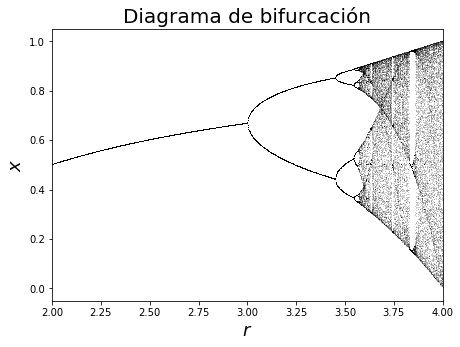

In [40]:
# Gráfico
plt.figure(figsize=(7, 5))
for i in np.arange(iteraciones):
    x = mapa_logistico(r, x)
    if i >= (iteraciones - ultimos):
        plt.plot(r, x, ',k', alpha=.2)
plt.xlim(np.min(r), np.max(r))
# plt.ylim(-.1, 1.1)
plt.title("Diagrama de bifurcación", fontsize=20)
plt.xlabel('$r$', fontsize=18)
plt.ylabel('$x$', fontsize=18)
plt.show()

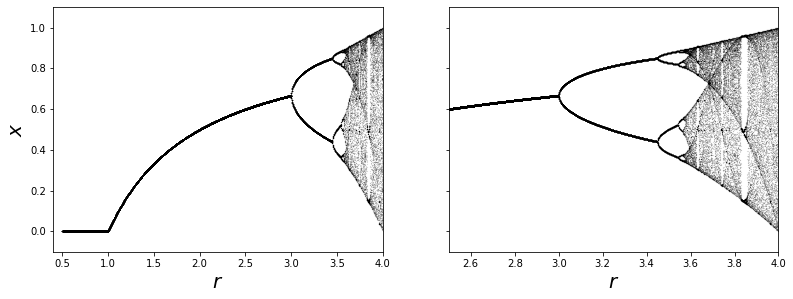

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row',figsize =(13,4.5))
r = np.linspace(.5, 4.0, n)
for i in np.arange(iteraciones):
    x = mapa_logistico(r, x)
    if i >= (iteraciones - ultimos):
        ax1.plot(r, x, '.k', alpha=1,  ms = .1)
r = np.linspace(2.5, 4.0, n)
for i in np.arange(iteraciones):
    x = mapa_logistico(r, x)
    if i >= (iteraciones - ultimos):
        ax2.plot(r, x, '.k', alpha=1, ms = .1)
ax1.set_xlim(.4, 4)
ax1.set_ylim(-.1, 1.1)
ax2.set_xlim(2.5, 4)
ax2.set_ylim(-.1, 1.1)
ax1.set_ylabel('$x$', fontsize = 20)
ax1.set_xlabel('$r$', fontsize = 20)
ax2.set_xlabel('$r$', fontsize = 20)
plt.show()

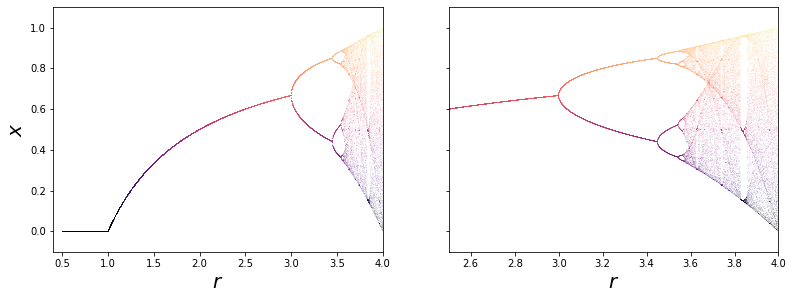

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row',figsize =(13,4.5))
r = np.linspace(.5, 4.0, n)
for i in np.arange(iteraciones):
    x = mapa_logistico(r, x)
    if i >= (iteraciones - ultimos):
        ax1.scatter(r, x,  s = .1, cmap= 'magma', c = x, lw = 0)
r = np.linspace(2.5, 4.0, n)
for i in np.arange(iteraciones):
    x = mapa_logistico(r, x)
    if i >= (iteraciones - ultimos):
        ax2.scatter(r, x, s = .1, cmap = 'magma', c = x, lw = 0)
ax1.set_xlim(.4, 4)
ax1.set_ylim(-.1, 1.1)
ax2.set_xlim(2.5, 4)
ax2.set_ylim(-.1, 1.1)
ax1.set_ylabel('$x$', fontsize = 20)
ax1.set_xlabel('$r$', fontsize = 20)
ax2.set_xlabel('$r$', fontsize = 20)
plt.show()

# Anuncios parroquiales

## 1. Quiz la siguiente clase.
## 2. Examen final: 5-7 mayo (se entrega el viernes 7 de mayo)
## 3. Clase de repaso martes 4 de mayo 8-10 pm.
## 4. Proyecto módulo 3: viernes 14 de mayo.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Lázaro Alonso. Modified by Esteban Jiménez Rodríguez.
</footer>